In [3]:
import numpy as np 
import pandas as pd 

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn 
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim

In [4]:
df = pd.read_json("schoolInfo.json")

In [ ]:
seaborn.pairplot(df)

C:\Users\abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6735: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6736: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

In [15]:
pd.options.display.max_columns = None

In [16]:
print(df.shape)
df.head()

(311, 39)


,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,8544,NaN,7.0,100.0,60.0,16793.0,NJ,1,3.9,princeton-university,National Universities,#1,overall,186131,False,True,NaN,47140,4.1,Princeton University,national-universities,NaN,None,national-universities,1,private,NaN,ranked,2627
1,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,2138,NaN,5.0,98.0,55.0,16338.0,MA,2,4.0,harvard-university,National Universities,#2,overall,166027,False,True,NaN,48949,3.6,Harvard University,national-universities,NaN,None,national-universities,2,private,NaN,ranked,2155
2,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,60637,NaN,8.0,96.0,42.0,27767.0,IL,3,4.0,university-of-chicago,National Universities,#3,overall,144050,True,True,NaN,54825,NaN,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,6520,NaN,6.0,96.0,50.0,18385.0,CT,3,NaN,yale-university,National Universities,#3,overall,130794,True,True,NaN,51400,3.4,Yale University,national-universities,NaN,None,national-universities,3,private,NaN,ranked,1426
4,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,10027,NaN,6.0,95.0,48.0,21041.0,NY,5,NaN,columbia-university,National Universities,#5,overall,190150,True,True,NaN,57208,3.8,Columbia University,national-universities,NaN,None,national-universities,5,private,NaN,ranked,2707


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
rankingNoteText            0 non-null float64
nonResponderText           11 non-null object
nonResponder               311 non-null bool
act-avg                    291 non-null float64
primaryPhoto               264 non-null object
primaryPhotoThumb          264 non-null object
sat-avg                    291 non-null float64
enrollment                 300 non-null float64
city                       311 non-null object
sortName                   311 non-null object
zip                        311 non-null int64
rankingNoteCharacter       0 non-null float64
acceptance-rate            302 non-null float64
rankingDisplayScore        230 non-null float64
percent-receiving-aid      143 non-null float64
cost-after-aid             143 non-null float64
state                      311 non-null object
rankingSortRank            311 non-null int64
hs-gpa-avg                 244 non-null float64
u

In [18]:
# drop columns which have only NaN values
df.dropna(axis=1, thresh=1, inplace=True)

In [19]:
df.head()

,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,aliasNames,rankingType,overallRank,institutionalControl,rankingRankStatus,primaryKey
0,None,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,8544,7.0,100.0,60.0,16793.0,NJ,1,3.9,princeton-university,National Universities,#1,overall,186131,False,True,NaN,47140,4.1,Princeton University,national-universities,None,national-universities,1,private,ranked,2627
1,None,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,2138,5.0,98.0,55.0,16338.0,MA,2,4.0,harvard-university,National Universities,#2,overall,166027,False,True,NaN,48949,3.6,Harvard University,national-universities,None,national-universities,2,private,ranked,2155
2,None,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,60637,8.0,96.0,42.0,27767.0,IL,3,4.0,university-of-chicago,National Universities,#3,overall,144050,True,True,NaN,54825,NaN,University of Chicago,national-universities,UChicago,national-universities,3,private,ranked,1774
3,None,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,6520,6.0,96.0,50.0,18385.0,CT,3,NaN,yale-university,National Universities,#3,overall,130794,True,True,NaN,51400,3.4,Yale University,national-universities,None,national-universities,3,private,ranked,1426
4,None,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,10027,6.0,95.0,48.0,21041.0,NY,5,NaN,columbia-university,National Universities,#5,overall,190150,True,True,NaN,57208,3.8,Columbia University,national-universities,None,national-universities,5,private,ranked,2707


In [20]:
df = df.drop(df.columns[[0,1,3,4,16,18,20,21,24,28,30]], axis=1)

print(df.shape)
df.head()

(311, 24)


,act-avg,sat-avg,enrollment,city,sortName,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,urlName,rankingDisplayRank,rankingIsTied,isPublic,tuition,engineeringRepScore,displayName,aliasNames,overallRank,institutionalControl,rankingRankStatus,primaryKey
0,32.0,1400.0,5400.0,Princeton,princetonuniversity,8544,7.0,100.0,60.0,16793.0,NJ,1,princeton-university,#1,False,True,47140,4.1,Princeton University,None,1,private,ranked,2627
1,32.0,1430.0,6710.0,Cambridge,harvarduniversity,2138,5.0,98.0,55.0,16338.0,MA,2,harvard-university,#2,False,True,48949,3.6,Harvard University,None,2,private,ranked,2155
2,32.0,1450.0,5941.0,Chicago,universityofchicago,60637,8.0,96.0,42.0,27767.0,IL,3,university-of-chicago,#3,True,True,54825,NaN,University of Chicago,UChicago,3,private,ranked,1774
3,32.0,1420.0,5472.0,New Haven,yaleuniversity,6520,6.0,96.0,50.0,18385.0,CT,3,yale-university,#3,True,True,51400,3.4,Yale University,None,3,private,ranked,1426
4,32.0,1430.0,6113.0,New York,columbiauniversity,10027,6.0,95.0,48.0,21041.0,NY,5,columbia-university,#5,True,True,57208,3.8,Columbia University,None,5,private,ranked,2707


In [21]:
df.dtypes

act-avg                  float64
sat-avg                  float64
enrollment               float64
city                      object
sortName                  object
zip                        int64
acceptance-rate          float64
rankingDisplayScore      float64
percent-receiving-aid    float64
cost-after-aid           float64
state                     object
rankingSortRank            int64
urlName                   object
rankingDisplayRank        object
rankingIsTied               bool
isPublic                    bool
tuition                    int64
engineeringRepScore      float64
displayName               object
aliasNames                object
overallRank                int64
institutionalControl      object
rankingRankStatus         object
primaryKey                 int64
dtype: object

In [22]:
place = df['city'][0:300] +[','] + df['state'][0:300]

In [23]:
place

0       Princeton,NJ
1       Cambridge,MA
2         Chicago,IL
3       New Haven,CT
4        New York,NY
           ...      
295    Carrollton,GA
296     Milwaukee,WI
297      Valdosta,GA
298       Wichita,KS
299        Dayton,OH
Length: 300, dtype: object

In [24]:
place[1]

'Cambridge,MA'

In [25]:
data = {'Longitude':[], 'Latitude':[], 'Location':[]}
geolocator = Nominatim(user_agent = "my_app")
for loc in range(300):
    location = geolocator.geocode(place[loc])
    #print(location.address)
    #print(location.latitude, location.longitude)
    data['Longitude'].append(location.longitude)
    data['Latitude'].append(location.latitude)
    data['Location'].append(location.address)

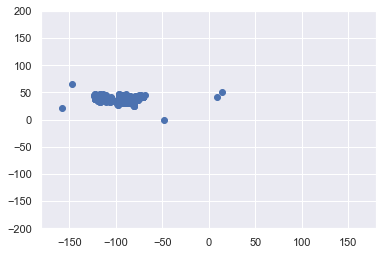

In [26]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-200,200)
plt.show()

In [27]:
coo = pd.DataFrame.from_dict(data,orient='index').transpose()
coo

,Longitude,Latitude,Location
0,-74.6684,40.3483,"Princeton, Mercer County, New Jersey, United S..."
1,-71.1056,42.3751,"Cambridge, Middlesex County, Massachusetts, Un..."
2,-87.6244,41.8756,"Chicago, Cook County, Illinois, United States"
3,-72.9251,41.3082,"New Haven, New Haven County, Connecticut, Unit..."
4,-74.006,40.7127,"New York, United States"
...,...,...,...
295,-85.0766,33.5801,"Carrollton, Carroll County, Georgia, United St..."
296,-87.9225,43.035,"Milwaukee, Milwaukee County, Wisconsin, United..."
297,-83.2785,30.8327,"Valdosta, Lowndes County, Georgia, 31604, Unit..."
298,-97.3375,37.6922,"Wichita, Sedgwick County, Kansas, 67202, Unite..."


In [28]:
x = coo.iloc[0:300,0:2]
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [29]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 4, 0, 0, 0, 2, 0, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1,
       0, 2, 1, 1, 0, 0, 3, 2, 0, 0, 0, 2, 0, 2, 4, 1, 1, 2, 4, 2, 2, 2,
       0, 2, 2, 2, 2, 4, 4, 0, 4, 4, 2, 0, 4, 0, 2, 0, 0, 2, 1, 2, 2, 4,
       4, 0, 0, 4, 1, 2, 0, 2, 2, 2, 2, 2, 4, 2, 0, 0, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 1, 1, 4, 2, 4, 4, 2, 0, 2, 4, 2, 4, 0, 2, 1, 1, 0, 4, 2,
       4, 0, 2, 2, 4, 0, 0, 2, 2, 1, 0, 1, 4, 1, 2, 0, 0, 4, 2, 0, 0, 1,
       2, 4, 2, 2, 1, 0, 0, 1, 1, 2, 3, 0, 4, 2, 1, 0, 0, 2, 0, 1, 2, 0,
       2, 4, 0, 2, 0, 2, 0, 2, 2, 4, 1, 0, 2, 2, 2, 0, 0, 4, 4, 4, 2, 4,
       4, 0, 0, 0, 1, 4, 2, 1, 0, 2, 0, 1, 1, 4, 2, 1, 0, 0, 4, 4, 0, 0,
       4, 1, 0, 0, 1, 0, 0, 2, 4, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 4, 2, 0, 0, 2, 0, 0, 1, 0, 4, 2, 1, 4, 2, 4, 1, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 2, 0, 0, 4, 1, 0, 0, 4, 4,
       0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0])

In [30]:
data_with_clusters = coo.copy()
data_with_clusters['Clusters'] = identified_clusters 


In [31]:
data_with_clusters

,Longitude,Latitude,Location,Clusters
0,-74.6684,40.3483,"Princeton, Mercer County, New Jersey, United S...",2
1,-71.1056,42.3751,"Cambridge, Middlesex County, Massachusetts, Un...",2
2,-87.6244,41.8756,"Chicago, Cook County, Illinois, United States",0
3,-72.9251,41.3082,"New Haven, New Haven County, Connecticut, Unit...",2
4,-74.006,40.7127,"New York, United States",2
...,...,...,...,...
295,-85.0766,33.5801,"Carrollton, Carroll County, Georgia, United St...",0
296,-87.9225,43.035,"Milwaukee, Milwaukee County, Wisconsin, United...",0
297,-83.2785,30.8327,"Valdosta, Lowndes County, Georgia, 31604, Unit...",0
298,-97.3375,37.6922,"Wichita, Sedgwick County, Kansas, 67202, Unite...",4


In [32]:
centroids = kmeans.cluster_centers_
centroids

array([[ -85.40041123,   36.89102678],
       [-119.49786101,   38.38096619],
       [ -74.64629451,   40.24412   ],
       [  11.5350464 ,   46.0240939 ],
       [ -97.51853445,   35.69494226]])

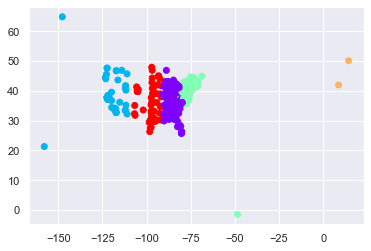

In [33]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [34]:
s = []
for i in df['state']:
    s.append(i)

In [35]:
c = []
for i in df['city']:
    c.append(i)

In [36]:
import tkinter as tk
import tkinter.ttk as ttk


def submit():
    price_input = float(price_tb.get("1.0", "end-1c"))
    state  = statelocation_menu.get()
    city = citylocation_menu.get()
    getthenearestcluster(price_input,state,city)
    root.destroy()

In [46]:
root = tk.Tk()
root.geometry("500x520")
 
#creating a scrollbar
scrollbar = tk.Scrollbar(root)


# creating a dropdown list
# datatype of menu text
state_clicked = tk.StringVar()
state_options = s



city_clicked = tk.StringVar()
city_options = c


statelocation_menu = ttk.Combobox(root , textvariable = state_clicked )
statelocation_menu['values'] = state_options
statelocation_menu['state'] = 'readonly'
statelocation_label = tk.Label( root , text = "Please select your State" )

citylocation_menu = ttk.Combobox(root , textvariable = city_clicked )
citylocation_menu['values'] = city_options
citylocation_menu['state'] = 'readonly'
citylocation_label = tk.Label( root , text = "Please select your City" )
   
statelocation_label.grid(row = 0, column = 0)
statelocation_menu.grid(row = 0, column = 1)

citylocation_label.grid(row = 3, column = 0)
citylocation_menu.grid(row = 3, column = 1)

price_tb = tk.Text(root,height = 1, width = 10)
price_tb.grid(row = 5, column =1)

price_label = tk.Label(root,text = "Please enter your price").grid(row = 5 , column = 0)


    
submit_button = tk.Button( root , text = "Submit" , command = lambda:submit() )
submit_button.grid(row = 8)


root.mainloop()

[[  8.78965223   2.39985482]
 [ 42.88710201   0.90991541]
 [ -1.96446449  -0.9532384 ]
 [-88.1458054   -6.7332123 ]
 [ 20.90777545   3.59593934]]
Final index 2
['Princeton University', 'Harvard University', 'Yale University', 'Columbia University', 'Massachusetts Institute of Technology', 'University of Pennsylvania', 'Duke University', 'Dartmouth College', 'Johns Hopkins University', 'Brown University', 'Cornell University', 'Georgetown University', 'Carnegie Mellon University', 'University of Virginia', 'Tufts University', 'New York University', 'University of North Carolina--Chapel Hill', 'Boston College', 'College of William and Mary', 'Brandeis University', 'University of Rochester', 'Boston University', 'Northeastern University', 'Rensselaer Polytechnic Institute', 'Lehigh University', 'Pennsylvania State University--University Park', 'George Washington University', 'University of Connecticut', 'Fordham University', 'Syracuse University', 'University of Maryland--College Park', '

In [45]:
def getthenearestcluster(price, state, city):
    place = state +','+city
    geolocator = Nominatim(user_agent = "my_app")
    location = geolocator.geocode(place)
    users_longitude = location.longitude
    users_latitude = location.latitude
    users_address = location.address
    
    users = [users_longitude,users_latitude]
    difference =[abs(users[0] - centroids[0][0]),abs(users[1] - centroids[0][1])]
    
    print(users-centroids)
    users = users - centroids
    sum = abs(users[0][0]) + abs(users[0][1])
        
    for i in range(1,len(centroids)):
        temp = abs(users[i][0]) + abs(users[i][1])
        if(sum > temp):
            sum = temp
            index = i
            
    print("Final index",index)
    getunivsinthatcluster(index)
            
    
        

In [42]:
def getunivsinthatcluster(index):
    univnames = []
    for i in range(0,300):
        if data_with_clusters['Clusters'].values[i] == index:
            univnames.append(df['displayName'].values[i])
            
    print(univnames)

In [43]:
val = data_with_clusters['Clusters'].values[0]
print(val)

2
